In [1]:
%matplotlib inline


# t-SNE: The effect of various perplexity values on the shape

An illustration of t-SNE on the two concentric circles and the S-curve
datasets for different perplexity values.

We observe a tendency towards clearer shapes as the perplexity value increases.

The size, the distance and the shape of clusters may vary upon initialization,
perplexity values and does not always convey a meaning.

As shown below, t-SNE for higher perplexities finds meaningful topology of
two concentric circles, however the size and the distance of the circles varies
slightly from the original. Contrary to the two circles dataset, the shapes
visually diverge from S-curve topology on the S-curve dataset even for
larger perplexity values.

For further details, "How to Use t-SNE Effectively"
https://distill.pub/2016/misread-tsne/ provides a good discussion of the
effects of various parameters, as well as interactive plots to explore
those effects.


circles, perplexity=5 in 1.3 sec
circles, perplexity=30 in 1.4 sec
circles, perplexity=50 in 0.74 sec
circles, perplexity=100 in 0.57 sec
S-curve, perplexity=5 in 0.47 sec
S-curve, perplexity=30 in 0.51 sec
S-curve, perplexity=50 in 0.56 sec
S-curve, perplexity=100 in 0.7 sec
[[0.         0.        ]
 [0.09090909 0.        ]
 [0.18181818 0.        ]
 [0.27272727 0.        ]
 [0.36363636 0.        ]
 [0.45454545 0.        ]
 [0.54545455 0.        ]
 [0.63636364 0.        ]
 [0.72727273 0.        ]
 [0.81818182 0.        ]
 [0.90909091 0.        ]
 [1.         0.        ]
 [0.         0.09090909]
 [0.09090909 0.09090909]
 [0.18181818 0.09090909]
 [0.27272727 0.09090909]
 [0.36363636 0.09090909]
 [0.45454545 0.09090909]
 [0.54545455 0.09090909]
 [0.63636364 0.09090909]
 [0.72727273 0.09090909]
 [0.81818182 0.09090909]
 [0.90909091 0.09090909]
 [1.         0.09090909]
 [0.         0.18181818]
 [0.09090909 0.18181818]
 [0.18181818 0.18181818]
 [0.27272727 0.18181818]
 [0.36363636 0.18181818

uniform grid, perplexity=50 in 0.74 sec
[[0.         0.        ]
 [0.09090909 0.        ]
 [0.18181818 0.        ]
 [0.27272727 0.        ]
 [0.36363636 0.        ]
 [0.45454545 0.        ]
 [0.54545455 0.        ]
 [0.63636364 0.        ]
 [0.72727273 0.        ]
 [0.81818182 0.        ]
 [0.90909091 0.        ]
 [1.         0.        ]
 [0.         0.09090909]
 [0.09090909 0.09090909]
 [0.18181818 0.09090909]
 [0.27272727 0.09090909]
 [0.36363636 0.09090909]
 [0.45454545 0.09090909]
 [0.54545455 0.09090909]
 [0.63636364 0.09090909]
 [0.72727273 0.09090909]
 [0.81818182 0.09090909]
 [0.90909091 0.09090909]
 [1.         0.09090909]
 [0.         0.18181818]
 [0.09090909 0.18181818]
 [0.18181818 0.18181818]
 [0.27272727 0.18181818]
 [0.36363636 0.18181818]
 [0.45454545 0.18181818]
 [0.54545455 0.18181818]
 [0.63636364 0.18181818]
 [0.72727273 0.18181818]
 [0.81818182 0.18181818]
 [0.90909091 0.18181818]
 [1.         0.18181818]
 [0.         0.27272727]
 [0.09090909 0.27272727]
 [0.181818

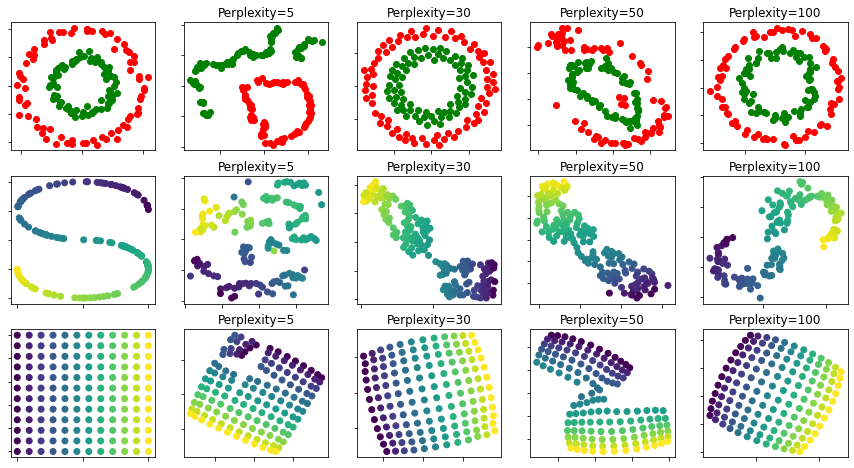

In [2]:
# Author: Narine Kokhlikyan <narine@slice.com>
# License: BSD

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

from matplotlib.ticker import NullFormatter
from sklearn import manifold, datasets
from time import time

n_samples = 150
n_components = 2
(fig, subplots) = plt.subplots(3, 5, figsize=(15, 8))
perplexities = [5, 30, 50, 100]

X, y = datasets.make_circles(
    n_samples=n_samples, factor=0.5, noise=0.05, random_state=0
)

red = y == 0
green = y == 1

ax = subplots[0][0]
ax.scatter(X[red, 0], X[red, 1], c="r")
ax.scatter(X[green, 0], X[green, 1], c="g")
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis("tight")

for i, perplexity in enumerate(perplexities):
    ax = subplots[0][i + 1]

    t0 = time()
    tsne = manifold.TSNE(
        n_components=n_components,
        init="random",
        random_state=0,
        perplexity=perplexity,
        n_iter=300,
    )
    
    Y = tsne.fit_transform(X)
    t1 = time()
    print("circles, perplexity=%d in %.2g sec" % (perplexity, t1 - t0))
    ax.set_title("Perplexity=%d" % perplexity)
    ax.scatter(Y[red, 0], Y[red, 1], c="r")
    ax.scatter(Y[green, 0], Y[green, 1], c="g")
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis("tight")

# Another example using s-curve
X, color = datasets.make_s_curve(n_samples, random_state=0)

ax = subplots[1][0]
ax.scatter(X[:, 0], X[:, 2], c=color)
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())

# vamos a calcular l TSNE en funcion de varios valores para perplexitie
for i, perplexity in enumerate(perplexities):
    ax = subplots[1][i + 1]

    t0 = time()
    tsne = manifold.TSNE(
        n_components=n_components,
        init="random",
        random_state=0,
        perplexity=perplexity,
        n_iter=300,
    )
    Y = tsne.fit_transform(X)
    t1 = time()
    print("S-curve, perplexity=%d in %.2g sec" % (perplexity, t1 - t0))

    ax.set_title("Perplexity=%d" % perplexity)
    ax.scatter(Y[:, 0], Y[:, 1], c=color)
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis("tight")


# Another example using a 2D uniform grid
x = np.linspace(0, 1, int(np.sqrt(n_samples)))
xx, yy = np.meshgrid(x, x)
X = np.hstack(
    [
        xx.ravel().reshape(-1, 1),
        yy.ravel().reshape(-1, 1),
    ]
)
color = xx.ravel()
ax = subplots[2][0]
ax.scatter(X[:, 0], X[:, 1], c=color)
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())

for i, perplexity in enumerate(perplexities):
    ax = subplots[2][i + 1]

    t0 = time()
    tsne = manifold.TSNE(
        n_components=n_components,
        init="random",
        random_state=0,
        perplexity=perplexity,
        n_iter=400,
    )
    print(X)
    Y = tsne.fit_transform(X)
    t1 = time()
    print("uniform grid, perplexity=%d in %.2g sec" % (perplexity, t1 - t0))

    ax.set_title("Perplexity=%d" % perplexity)
    ax.scatter(Y[:, 0], Y[:, 1], c=color)
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis("tight")


plt.show()

## Aplicar t-SNE sobre los datos de MCA vistos en la S3_SOMs

Haz varios experimentos variando los diferentes (número de iteraciones, perplexity,  parámetros del algoritmo de manera que se alcance la mejor separación entre grupos.

https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html

In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

circles, perplexity=5 in 0.29 sec
circles, perplexity=30 in 0.29 sec
circles, perplexity=40 in 0.28 sec
circles, perplexity=50 in 0.3 sec
circles, perplexity=100 in 0.3 sec


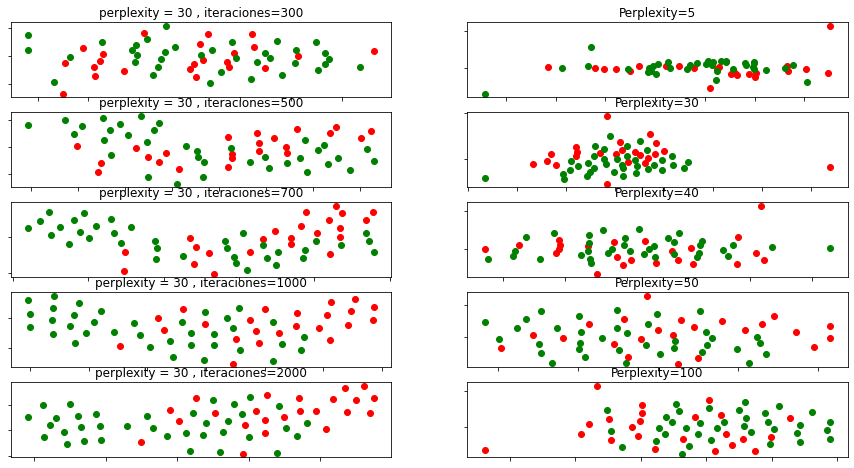

In [6]:
# Cargar los datos
df = pd.read_csv("data/MCA.csv")


# Normalizar los datos
scaler = MinMaxScaler()
df.iloc[:,1:5] =scaler.fit_transform(df.iloc[:,1:5])
X= df.iloc[:,1:5]

# re-definimos las classes  
c= (df.iloc[:,0]== "C")
df.iloc[c,0] = 0
v= (df.iloc[:,0]== "VI")
df.iloc[v,0] = 1


# t-SNE
n_components = 2
(fig, subplots) = plt.subplots(5, 2, figsize=(15, 8))
perplexities = [5, 30,40, 50, 100]
iter =[300,500,700,1000,2000]
###


# vamos a iterar varios valores de  perplexity  
for i, perplexity in enumerate(perplexities):
    ax = subplots[i][ 1]

    t0 = time()
    tsne = manifold.TSNE(
        n_components=n_components,
        init="random",
        random_state=0,
        perplexity=perplexity,
        n_iter=300,
    )
    
    Y = tsne.fit_transform(X)
    t1 = time()
    print("circles, perplexity=%d in %.2g sec" % (perplexity, t1 - t0))
    ax.set_title("Perplexity=%d" % perplexity)
    ax.scatter(Y[c, 0], Y[c, 1], c="r")
    ax.scatter(Y[v, 0], Y[v, 1], c="g")
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis("tight")



# Variamos las iteraciones 

for i, it in enumerate(iter):
    ax = subplots[i][ 0]

    t0 = time()
    tsne = manifold.TSNE(
        n_components=n_components,
        init="random",
        early_exaggeration= 50,  # hemos puesto el parámetro de eary exxageratin grande para espaciar más los dos clusters
        random_state=0,
        perplexity=30,
        n_iter=it,
    )
    
    Y = tsne.fit_transform(X)
    t1 = time()
    #print("circles, iteraciones=%d in %.2g sec" % (perplexity, t1 - t0))
    ax.set_title("perplexity = 30 , iteraciones=%d" % it)
    ax.scatter(Y[c, 0], Y[c, 1], c="r")
    ax.scatter(Y[v, 0], Y[v, 1], c="g")
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis("tight")






#### En función del resultado obtenido con los Mapas Autoorganizados, ¿consideras lógico que el algoritmo t-SNE no llegue a separar adecuadamente los 2 grupos?


En los resultados obtenidos en los Mapas Autooranizaos, vimos que tendiamos a 3 clusters. Uno formsdo por enfermos, otro formado por sanos y otro que pertenecia a una mezcla de los dos. 
En los resultados para una perplexity de 30 y iteraciones altas, vemos que el patrón a seguir es el mismo. tenemos una nube densa de enfermos, en el otro extremo de sanos y en el centro tenemos una mezcla de ambos. 

Por lo que podemos concluir que el resultado es lógico 